# Medical Insurance Cost Using Linear Regression
Health insurance are affected by a person age, sex, bmi, children, smoker status and region. In this study, we want to use linear regression to model the medical insurance cost for a person.

In [1]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

# ignore warnings
warnings.filterwarnings('ignore')

In [3]:
# read and preview data
df = pd.read_csv('../../data/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# check the dimension
df.shape

(1338, 7)

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
# check the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
# check the empty values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

No misssing or null values are detected. We can proceed to EDA and visualization. 

# EDA

Text(0.5, 1.0, 'Distribution of Charges')

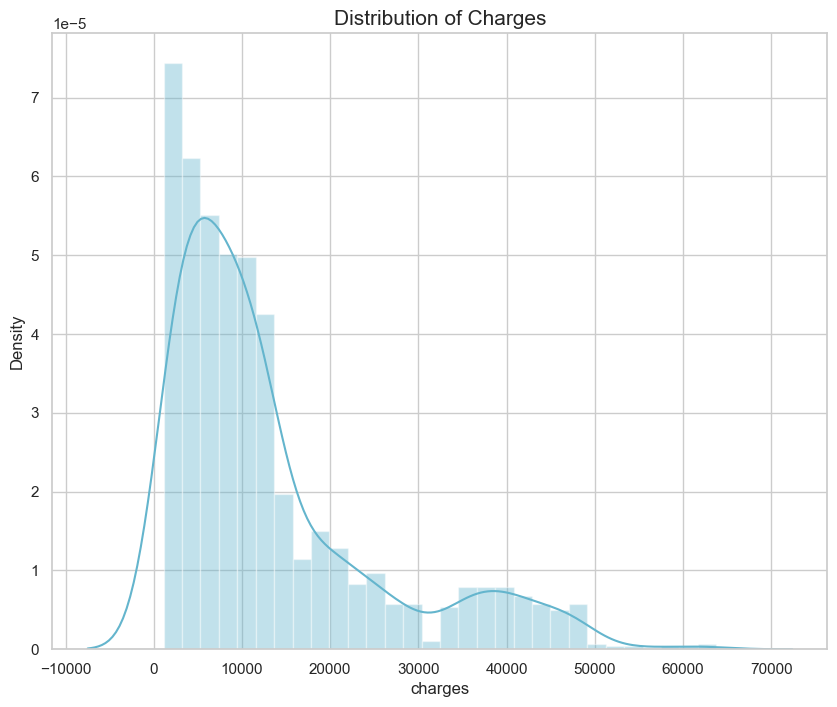

In [9]:
# charge distribution

sns.set(style = 'whitegrid')
f, ax = plt.subplots(figsize = (10, 8))
ax = sns.distplot(df['charges'], bins = 30, color = 'c')
plt.title('Distribution of Charges', fontsize = 15)

- The charges appear rightly-skewed. We will use logarithm to normalize it

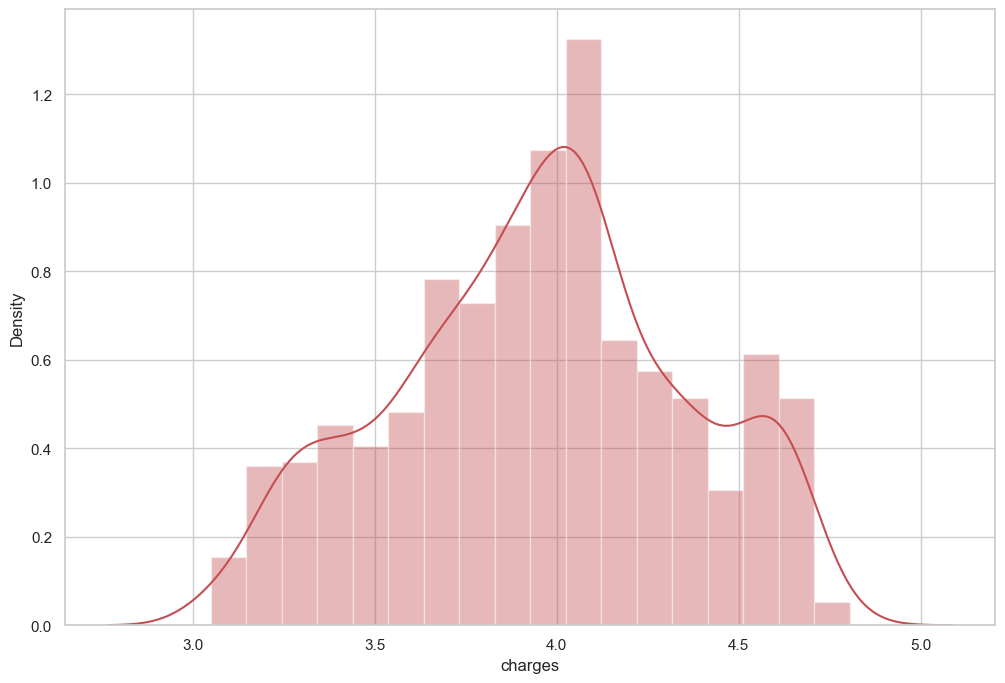

In [13]:
f, ax = plt.subplots(1,1, figsize = (12,8))
ax = sns.distplot(np.log10(df['charges']), kde = True, color = 'r')

<Axes: xlabel='charges', ylabel='region'>

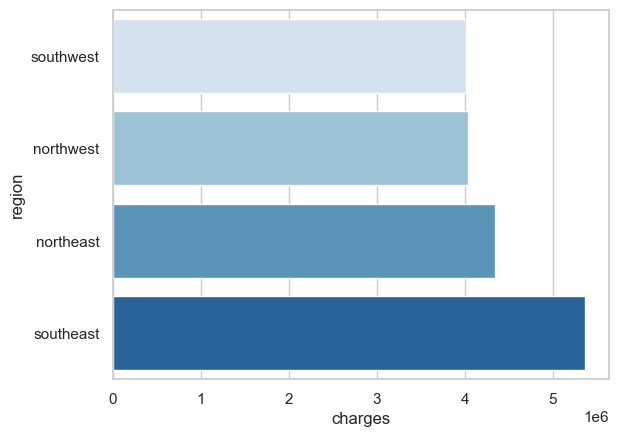

In [36]:
# charges by region
temp = df['charges'].groupby(df['region']).sum().sort_values(ascending = True)
temp = pd.DataFrame(temp)
temp['region'] = temp.index
sns.barplot(data = temp, x = 'charges', y = 'region', palette='Blues')

- Southeast has the highest charge and southwest has the lowest charge

<Axes: xlabel='region', ylabel='charges'>

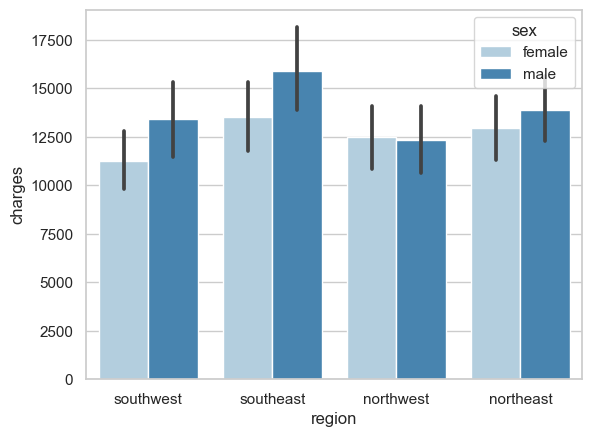

In [37]:
# charge by region
sns.barplot(x = 'region', y  = 'charges', hue = 'sex', data = df, palette = 'Blues')

<Axes: xlabel='region', ylabel='charges'>

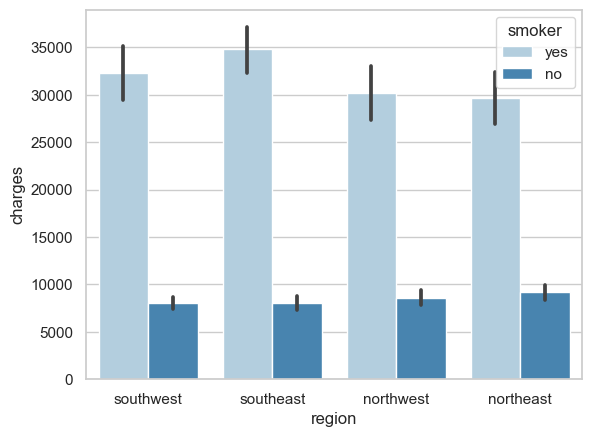

In [38]:
# charge by smoker
sns.barplot(x = 'region', y = 'charges', hue = 'smoker', data = df, palette = 'Blues')

<Axes: xlabel='region', ylabel='charges'>

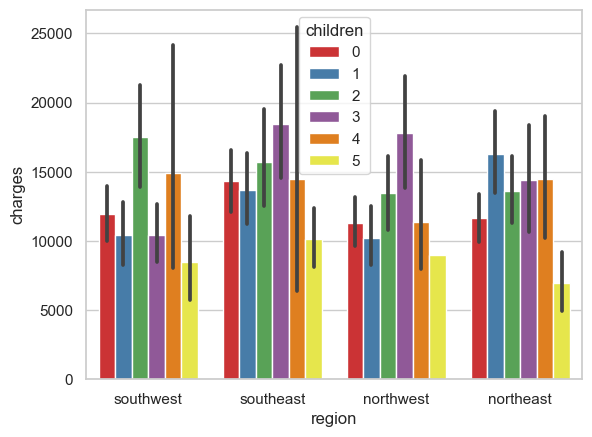

In [41]:
# charge by number of children
sns.barplot(x = 'region', y = 'charges', data = df, hue = 'children', palette = 'Set1')

- We can see that smokers tend to be charged more than non-smokers. Southeast smokers were charged the most while northeast charged the least. And people with children tend to have higher medical costs overall as well

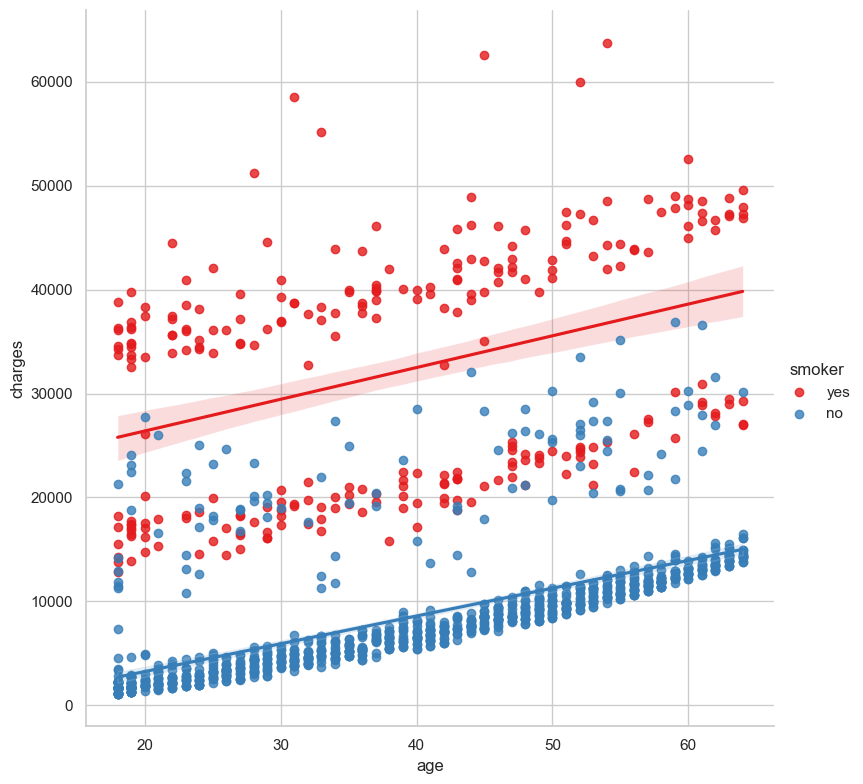

In [42]:
sns.lmplot(x = 'age', y = 'charges', hue = 'smoker', data = df, palette = 'Set1', height = 8)

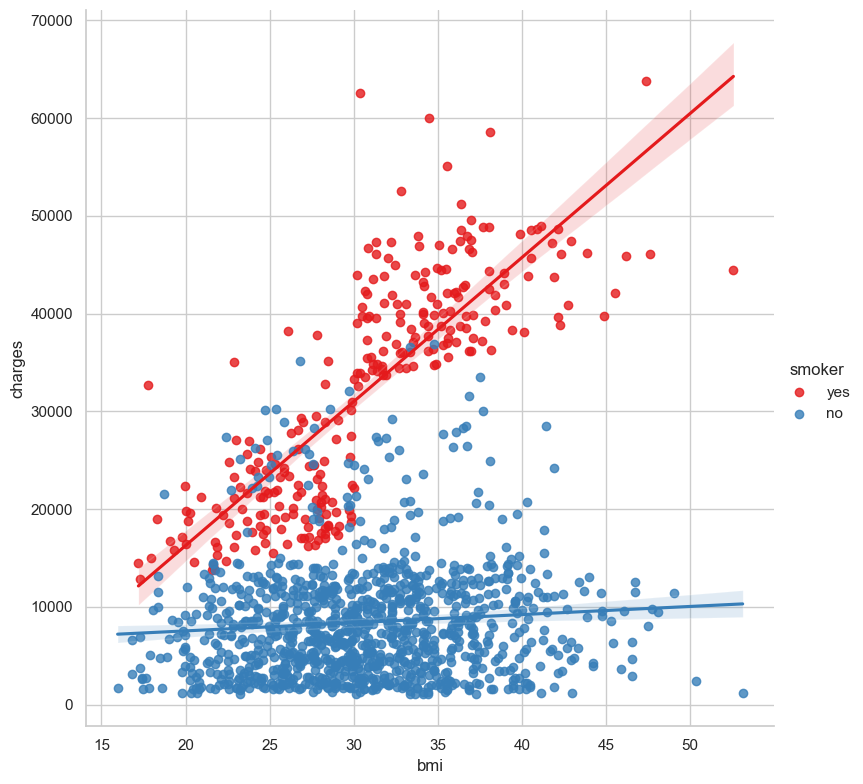

In [43]:
sns.lmplot(x = 'bmi', y = 'charges', hue = 'smoker', data = df, palette = 'Set1', height = 8)

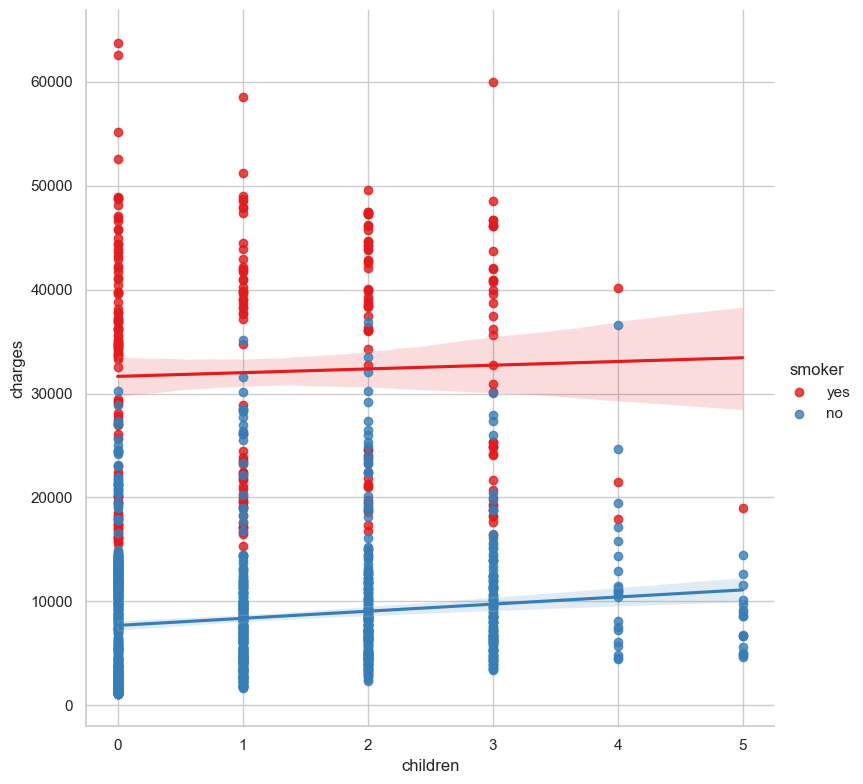

In [44]:
sns.lmplot(x = 'children', y = 'charges', hue = 'smoker', data = df, palette = 'Set1', height = 8)

Smoking has highest impact on medical cost. Medical cost will grow with children, age and bmi as well. People with children will also smoke less

<Axes: xlabel='children', ylabel='charges'>

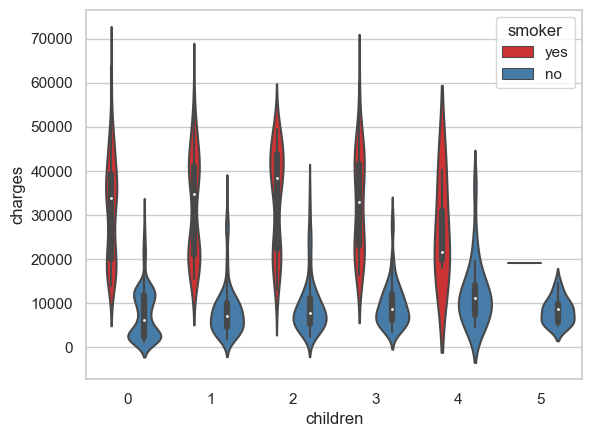

In [45]:
sns.violinplot(x = 'children', y = 'charges', hue = 'smoker', data = df, palette = 'Set1', height = 8)

In [46]:
# convert object to category
df[['sex', 'smoker', 'region']] = df[['sex', 'smoker', 'region']].astype('category')
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [47]:
# perform label encoding
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)
label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)
label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)
df.dtypes

age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
charges     float64
dtype: object

<Axes: >

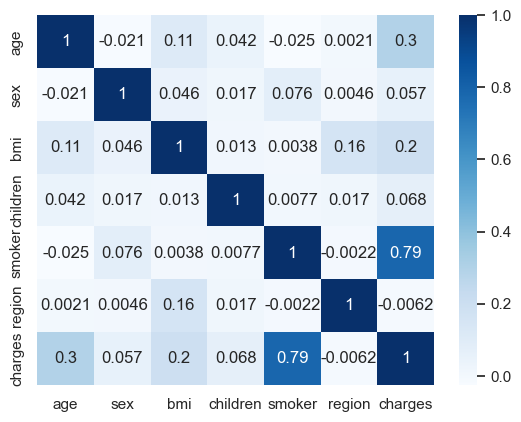

In [48]:
# heatmap visualization
sns.heatmap(df.corr(), annot = True, cmap = 'Blues')

No correlation except smoking.

# Model Fitting

In [49]:
# train test splitting
from sklearn.model_selection import train_test_split
X = df.drop(['charges'], axis = 1)
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 0)

In [52]:
# fit the model
from sklearn.linear_model import LinearRegression
Lin_reg = LinearRegression()
Lin_reg.fit(X_train, y_train)

# get the model coefficients and intercept
print('Coefficients: \n', Lin_reg.coef_)
print('Intercept: \n', Lin_reg.intercept_)

# model performance
print('R^2 score for train data: {:.4f}'.format(Lin_reg.score(X_test, y_test)))

Coefficients: 
 [  253.99185244   -24.32455098   328.40261701   443.72929547
 23568.87948381  -288.50857254]
Intercept: 
 -11661.983908824417
R^2 score for train data: 0.7999


This is good enough. We will explore some other methods and perform some further analyses.

# Ridge Regression

In [53]:
# using ridge regression
from sklearn.linear_model import Ridge
Ridge_reg = Ridge(alpha = 0.5)
Ridge_reg.fit(X_train, y_train)

# model coefficients and intercept
print('Coefficients: \n', Ridge_reg.coef_)
print('Intercept: \n', Ridge_reg.intercept_)

# model performance
print('R^2 score for train data: {:.4f}'.format(Ridge_reg.score(X_test, y_test)))

Coefficients: 
 [ 2.53893751e+02 -2.15112284e+01  3.28339566e+02  4.44238477e+02
  2.35009674e+04 -2.89027871e+02]
Intercept: 
 -11643.440927495829
R^2 score for train data: 0.7997


# Lasso Regression

In [59]:
# using lasso regression
from sklearn.linear_model import Lasso
Lasso_reg = Lasso(alpha = 0.2, fit_intercept=True, precompute=False, copy_X=True, max_iter=1000, tol = 0.0001, warm_start = False, positive = False, random_state = None, selection = 'cyclic')
Lasso_reg.fit(X_train, y_train)

# model coefficients and intercept
print('Coefficients: \n', Lasso_reg.coef_)
print('Intercept: \n', Lasso_reg.intercept_)

# model performance
print('R^2 score for train data: {:.4f}'.format(Lasso_reg.score(X_test, y_test)))

Coefficients: 
 [ 2.53991436e+02 -2.34569821e+01  3.28389438e+02  4.43587436e+02
  2.35676136e+04 -2.88340296e+02]
Intercept: 
 -11661.838929039533
R^2 score for train data: 0.7999


# Random Forest Regressor

In [63]:
# uing random forest regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

x = df.drop(['charges'], axis = 1)
y = df['charges']

rfr = RandomForestRegressor(n_estimators = 100, criterion='squared_error', random_state=1, n_jobs=-1)
rfr.fit(X_train, y_train)
x_train_pred = rfr.predict(X_train)
x_test_pred = rfr.predict(X_test)

# evaluation
print('MSE train data: %.3f, MSE test data: %.3f' % 
      (metrics.mean_squared_error(x_train_pred, y_train),
       metrics.mean_squared_error(x_test_pred, y_test)))

print('R2 train data: %.3f, R2 test data: %.3f' % 
      (metrics.r2_score(x_train_pred, y_train),
       metrics.r2_score(x_test_pred, y_test)))

MSE train data: 3628893.887, MSE test data: 19730453.910
R2 train data: 0.972, R2 test data: 0.867


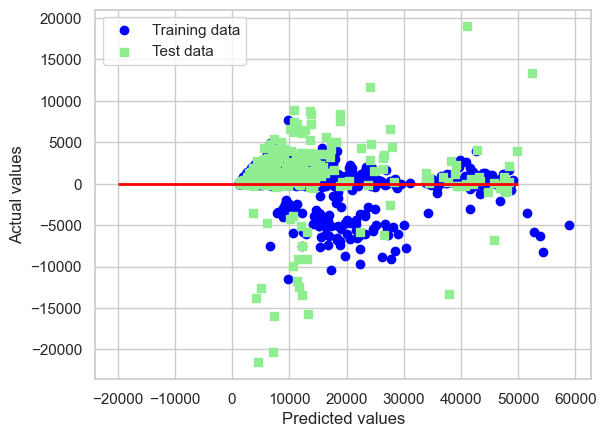

In [65]:
# plot the train and test data
plt.scatter(x_train_pred, x_train_pred - y_train, c = 'blue', marker = 'o', label = 'Training data')
plt.scatter(x_test_pred, x_test_pred - y_test, c = 'lightgreen', marker = 's', label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = -20000, xmax = 50000, lw = 2, color = 'red')

1. smoker (0.601678)
2. bmi (0.218831)
3. age (0.136943)
4. children (0.020990)
5. region (0.015165)
6. sex (0.006393)


<BarContainer object of 6 artists>

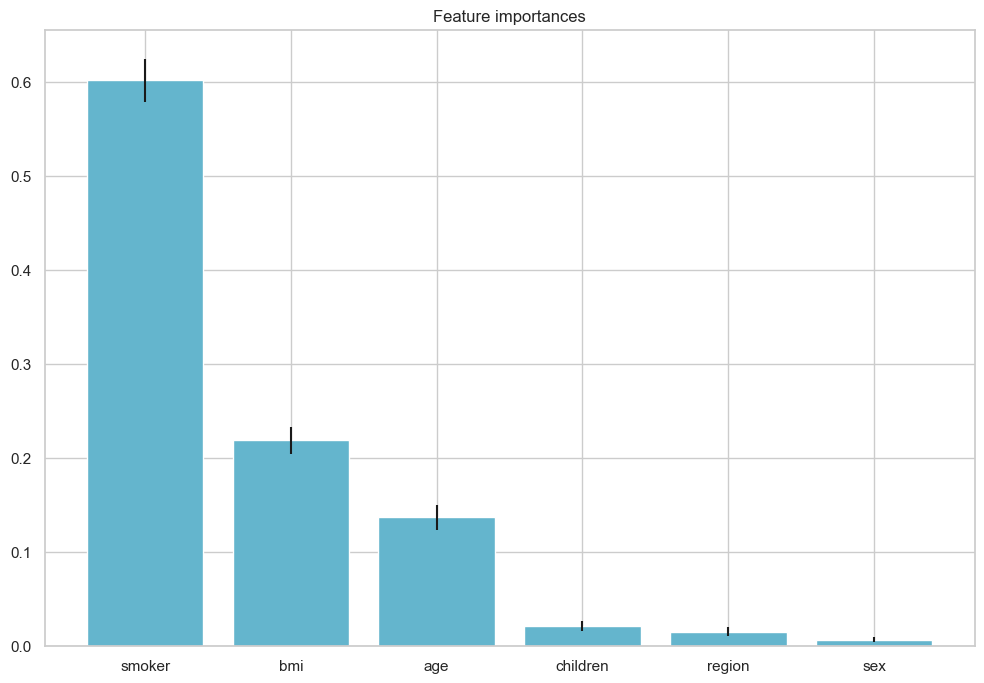

In [66]:
# get the importane features
importances = rfr.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfr.estimators_], axis = 0)
indices = np.argsort(importances)[::-1]
variables = x.columns
importance_list = []

for f in range(x.shape[1]):
    variable = variables[indices[f]]
    importance_list.append(variable)
    print("%d. %s (%f)" % (f + 1, variable, importances[indices[f]]))

# plot the feature importances
plt.figure(figsize = (12,8))
plt.title("Feature importances")
plt.bar(importance_list, importances[indices], color = 'c', yerr = std[indices], align = 'center')

# Polynomial Regression

In [67]:
# using polynomial regression
from sklearn.preprocessing import PolynomialFeatures
x = df.drop(['charges', 'sex', 'region'], axis = 1)
y = df.pop('charges')

pol = PolynomialFeatures(degree = 2)
x_pol = pol.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_pol, y, test_size = 0.2, random_state = 0)
Pol_reg = LinearRegression()
Pol_reg.fit(x_train, y_train)

# making prediction
y_train_pred = Pol_reg.predict(x_train)
y_test_pred = Pol_reg.predict(x_test)

# model performance
print('R^2 score for test data: {:.4f}'.format(Pol_reg.score(x_test, y_test)))

# model intercept and coefficients
print('Intercept: \n', Pol_reg.intercept_)
print('Coefficients: \n', Pol_reg.coef_)

R^2 score for test data: 0.8813
Intercept: 
 -5325.881705252867
Coefficients: 
 [ 0.00000000e+00 -4.01606591e+01  5.23702019e+02  8.52025026e+02
 -9.52698471e+03  3.04430186e+00  1.84508369e+00  6.01720286e+00
  4.20849790e+00 -9.38983382e+00  3.81612289e+00  1.40840670e+03
 -1.45982790e+02 -4.46151855e+02 -9.52698471e+03]


In [68]:
# model evaluation
print('Mean Absolute Error (MAE): {:.4f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))
print('Mean Squared Error (MSE): {:.4f}'.format(metrics.mean_squared_error(y_test, y_test_pred)))
print('Root Mean Squared Error (RMSE): {:.4f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))))

Mean Absolute Error (MAE): 2824.4950
Mean Squared Error (MSE): 18895160.0988
Root Mean Squared Error (RMSE): 4346.8563


In [69]:
# making prediction
y_test_pred = Pol_reg.predict(x_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
df.head(10)

,Actual,Predicted
578,9724.53000,12101.156323
610,8547.69130,10440.782266
569,45702.02235,48541.022951
1034,12950.07120,14140.067522
198,9644.25250,8636.235727
981,4500.33925,5072.787029
31,2198.18985,3090.494817
1256,11436.73815,13171.361938
1219,7537.16390,9187.612192
1320,5425.02335,7496.320857


To conclude, smoking affect medical cost charges the most (see the feature importance from random forest regressor) follow by bmi and age. As for model comparison, polynomial regression stands out to be the best model in this study.